In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
num_runs = 250
num_visits_list = range(1,11)

mle_rel = {}
mle_std = {}
nominal_rel = {}
nominal_std = {}
second_order_rel = {}
second_order_std = {}
mle_bayes_rel = {}
mle_bayes_std = {}
nominal_bayes_rel = {}
nominal_bayes_std = {}
second_order_bayes_rel = {}
second_order_bayes_std = {}


for num_visits in num_visits_list:
    thing = "_ground_truths"
    for string, name in [("mle", "mle"+thing), ("nominal", "nominal"+thing), ("grad", "grad"+thing), ("second_order", "second_order"+thing)]:
        globals()[name] = np.array([(np.load(f"synthetic_mdps/M{num_visits}/run{run}/{string}{thing}.npy")) for run in range(num_runs)])

    thing = "_bayes_values"
    for string, name in [("mle", "mle"+thing), ("nominal", "nominal"+thing), ("grad", "grad"+thing), ("second_order", "second_order"+thing)]:
        globals()[name] = np.array([(np.load(f"synthetic_mdps/M{num_visits}/run{run}/{string}{thing}.npy")) for run in range(num_runs)])

    mle_rel[num_visits] = (grad_ground_truths - mle_ground_truths).mean()
    nominal_rel[num_visits] = (grad_ground_truths - nominal_ground_truths).mean()
    second_order_rel[num_visits] = (grad_ground_truths - second_order_ground_truths).mean()

    mle_std[num_visits] = (grad_ground_truths - mle_ground_truths).std(ddof=1)
    nominal_std[num_visits] = (grad_ground_truths - nominal_ground_truths).std(ddof=1)
    second_order_std[num_visits] = (grad_ground_truths - second_order_ground_truths).std(ddof=1)

    mle_bayes_rel[num_visits] = (grad_bayes_values - mle_bayes_values).mean()
    nominal_bayes_rel[num_visits] = (grad_bayes_values - nominal_bayes_values).mean()
    second_order_bayes_rel[num_visits] = (grad_bayes_values - second_order_bayes_values).mean()

    mle_bayes_std[num_visits] = (grad_bayes_values - mle_bayes_values).std(ddof=1)
    nominal_bayes_std[num_visits] = (grad_bayes_values - nominal_bayes_values).std(ddof=1)
    second_order_bayes_std[num_visits] = (grad_bayes_values - second_order_bayes_values).std(ddof=1)


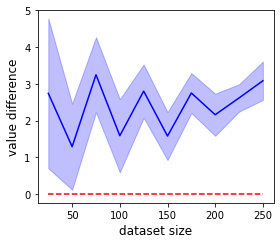

In [3]:
dataset_sizes = [25*m for m in num_visits_list]
policy = "second_order"

plt.figure(figsize=(4,3.5))
    
x = (np.array(dataset_sizes))

if policy == "mle":
    y = mle_rel
    std = mle_std
elif policy == "nominal":
    y = nominal_rel
    std = nominal_std
elif policy == "second_order":
    y = second_order_rel
    std = second_order_std
y = np.array([y[i] for i in num_visits_list])
std = np.array([std[i] for i in num_visits_list])/np.sqrt(num_runs)

plt.hlines(0, x[0], x[-1], color='r', linestyles='dashed')
plt.plot(x, y, color='b')

plt.fill_between((np.array(dataset_sizes)), y+std, y-std, color='b', alpha = 0.25)

plt.xlabel("dataset size", fontsize=12)#, labelsize=9)
plt.ylabel(f"value difference", fontsize=12)#, labelsize=9)
plt.tight_layout()

if not os.path.isdir("synthetic_figures"):
    os.mkdir("synthetic_figures")
plt.savefig(f'synthetic_figures/{policy}_ground_truth.pdf')
plt.show()

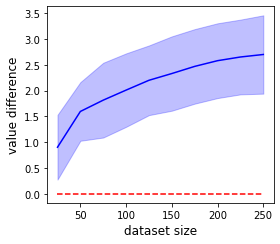

In [4]:
dataset_sizes = [25*m for m in num_visits_list]
policy = "second_order"

plt.figure(figsize=(4,3.5))
    
x = (np.array(dataset_sizes))

if policy == "mle":
    y = mle_bayes_rel
    std = mle_bayes_std
elif policy == "nominal":
    y = nominal_bayes_rel
    std = nominal_bayes_std
elif policy == "second_order":
    y = second_order_bayes_rel
    std = second_order_bayes_std
y = np.array([y[i] for i in num_visits_list])
std = np.array([std[i] for i in num_visits_list])

plt.hlines(0, x[0], x[-1], color='r', linestyles='dashed')
plt.plot(x, y, color='b')

plt.fill_between((np.array(dataset_sizes)), y+std, y-std, color='b', alpha = 0.25)

plt.xlabel("dataset size", fontsize=12)
plt.ylabel(f"value difference", fontsize=12)
plt.tight_layout()

if not os.path.isdir("synthetic_figures"):
    os.mkdir("synthetic_figures")
plt.savefig(f'synthetic_figures/{policy}_bayes.pdf')
plt.show()